In [241]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import warnings

sjerplot = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/dpdshapefilelatlong/dpdshapefilelatlong.shp')
nonzero = sjerplot.loc[~(sjerplot["X"] == 0) & ~(sjerplot["Y"] == 0) & ~(sjerplot["Cancelled"] != 0)].copy()
nonzero = nonzero.loc[nonzero["Source"] != "Self Initiated"]
dpdbeats = ['511', '512', '513', '411', '111', '112', '214', '223']
dpdbeatsnonzero = nonzero[nonzero['Beat'].isin(dpdbeats)] 

print(nonzero.shape) 
nonzero.head(6)

pd.set_option("display.max_columns", 100,"display.max_rows",100)

(122803, 15)


In [ ]:
nonzero.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 122803 entries, 0 to 278272
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Event Numb  122803 non-null  int64   
 1   Case Numbe  34318 non-null   object  
 2   Call Date   122803 non-null  object  
 3   Call Time   122803 non-null  object  
 4   Source      122803 non-null  object  
 5   Priority    122258 non-null  object  
 6   Nature      122803 non-null  object  
 7   Address     122803 non-null  object  
 8   X           122803 non-null  int64   
 9   Y           122803 non-null  int64   
 10  District    122148 non-null  object  
 11  Beat        122128 non-null  object  
 12  Dispositio  122803 non-null  object  
 13  Cancelled   122803 non-null  int64   
 14  geometry    122803 non-null  geometry
dtypes: geometry(1), int64(4), object(10)
memory usage: 15.0+ MB


In [ ]:
nonzero["Source"].value_counts()

Wireless 911 Call                57069
Phone Call                       38132
Alarm Line                        9386
E-911                             8741
ASAP Alarm Interface              3806
{Other}                           2525
Language Line                     1442
Report Only                        816
Radio                              412
Texting                            287
DCI Message                        141
In House Translation                33
(blank)                              7
Telephone Device For The Deaf        6
Name: Source, dtype: int64

In [ ]:
type(nonzero)

geopandas.geodataframe.GeoDataFrame

In [ ]:
nonzero.total_bounds


array([-79.10436128, -82.77787819, 103.82293245,  36.24634408])

In [ ]:
nonzero.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
nonzero.geom_type

0         Point
1         Point
2         Point
3         Point
4         Point
          ...  
278266    Point
278267    Point
278268    Point
278271    Point
278272    Point
Length: 122803, dtype: object

In [ ]:
nonzero.shape

(122803, 15)

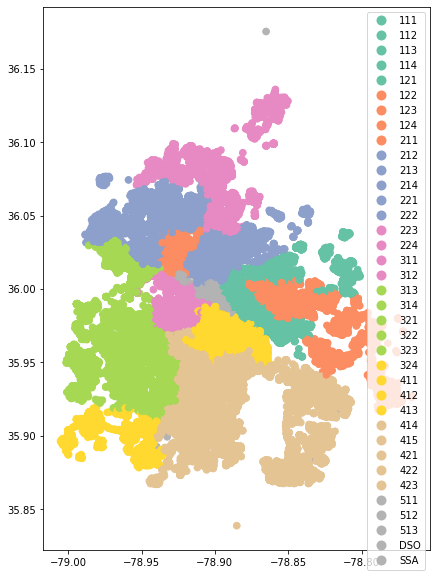

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))

# quickly plot the data adding a legend
nonzero.plot(column='Beat', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=45, 
                         cmap="Set2", ax=ax, aspect=1);

In [242]:
policebeats = gpd.read_file('/Users/erikrobertsson/Desktop/Police_Beats/Police_Beats.shp')
# policebeats2 = policebeats.to_crs("SR-ORG:12")
# law_beat_shapefile.to_file("path/to/new/output/file.shp")
policebeats.head()

,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,LAWBEAT,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,geometry
0,1,29657.869141,None,None,D2,299,SSA,None,2.075708e+07,29657.868615,"POLYGON ((-78.86588 36.18066, -78.86602 36.180..."
1,2,18915.720703,None,None,D2,299,SSA,None,2.086135e+06,18915.724912,"POLYGON ((-78.85731 36.17823, -78.85731 36.178..."
2,3,1193.728027,None,None,D2,299,SSA,None,6.682308e+04,1193.727878,"POLYGON ((-78.86585 36.18027, -78.86572 36.180..."
3,4,1308.963013,None,None,DSO,999,DSO,None,6.932677e+04,1308.962953,"POLYGON ((-78.86585 36.18027, -78.86635 36.179..."
4,5,1467.506958,None,None,DSO,999,DSO,None,8.512911e+04,1467.506955,"POLYGON ((-78.86452 36.17903, -78.86448 36.179..."


In [243]:
policebeats = policebeats.to_crs("4326")
policebeats = policebeats.dissolve(by="LAWBEAT")
policebeats["Beat"] = policebeats.index
policebeats = policebeats.reset_index()
policebeats["id"] = policebeats.index
policebeats

,LAWBEAT,geometry,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,Beat,id
0,111,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,111,0
1,112,"POLYGON ((-78.88787 36.01473, -78.88734 36.014...",51,26265.849609,I,yes,D1,112,None,2.079934e+07,26265.852604,112,1
2,113,"POLYGON ((-78.87372 35.99369, -78.87458 35.991...",62,20667.539062,I,yes,D1,113,None,2.159195e+07,20667.538873,113,2
3,114,"MULTIPOLYGON (((-78.84053 35.95436, -78.84021 ...",65,53321.980469,I,yes,D1,114,None,6.103382e+07,53321.974873,114,3
4,121,"MULTIPOLYGON (((-78.80746 35.99706, -78.80746 ...",38,14495.120117,I,no,D1,121,None,7.008533e+06,14495.120026,121,4
5,122,"POLYGON ((-78.84694 36.00614, -78.84634 36.006...",54,36686.679688,I,yes,D1,122,None,3.436298e+07,36686.681354,122,5
6,123,"MULTIPOLYGON (((-78.83723 36.00399, -78.83722 ...",55,74375.859375,I,yes,D1,123,None,7.495698e+07,74375.856455,123,6
7,124,"MULTIPOLYGON (((-78.77636 35.92139, -78.77722 ...",63,10708.070312,I,no,D1,124,None,3.022588e+06,10708.070450,124,7
8,211,"POLYGON ((-78.91430 36.04098, -78.91427 36.040...",36,36748.878906,I,yes,D2,211,None,6.487864e+07,36748.875052,211,8
9,212,"POLYGON ((-78.90513 36.01904, -78.90330 36.019...",43,37127.789062,I,yes,D2,212,None,4.301152e+07,37127.786492,212,9


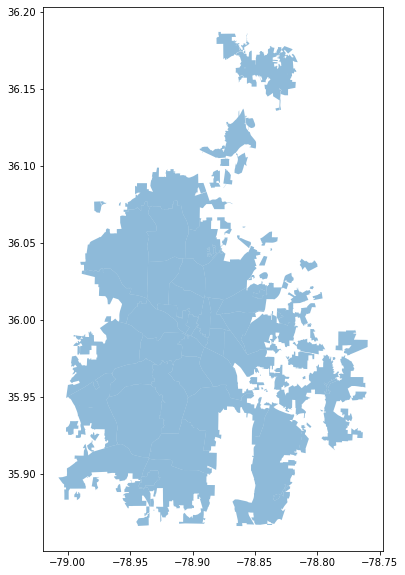

In [154]:
fig, ax = plt.subplots(figsize = (10,10))
policebeats.plot(ax = ax, alpha = 0.5)
plt.show()

In [ ]:
policebeats.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [191]:
nonzero = gpd.GeoDataFrame(nonzero, geometry=gpd.points_from_xy(nonzero.X, nonzero.Y))
nonzero = nonzero.set_crs("epsg:2264")
nonzero.head()

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (2055372.000 818537.000)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (2024961.000 815902.000)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (2038061.000 841530.000)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (2045947.000 796806.000)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (2037016.000 818259.000)


In [192]:
nonzero = nonzero.to_crs("EPSG:4326")
nonzero.head()

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (-78.81280 35.99886)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (-78.91562 35.99174)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (-78.87123 36.06210)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (-78.84478 35.93921)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (-78.87486 35.99818)


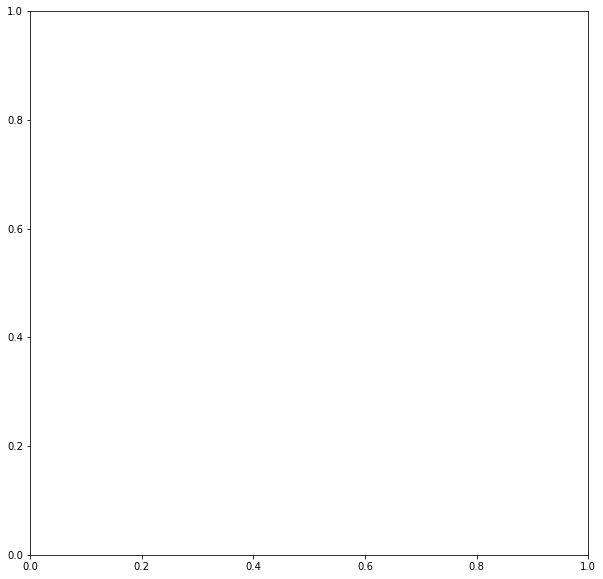

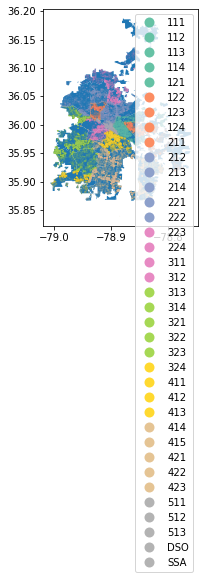

In [155]:
fig, ax = plt.subplots(figsize = (10,10))

# quickly plot the data adding a legend
# base = policebeats.plot()
nonzero.plot(column='Beat', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.001, 
                         cmap="Set2", ax=policebeats.plot(), aspect=1);

<AxesSubplot:>

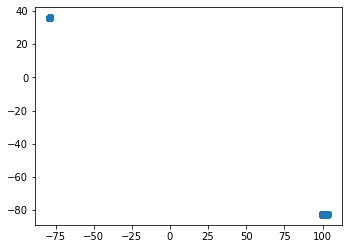

In [ ]:
base = policebeats.plot()
nonzero.plot(ax = base)

In [ ]:
beatswithcalls = nonzero.sjoin(policebeats, how="inner", predicate='contains')
beatswithcalls.head()

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry,index_right,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,LAWBEAT,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen


In [ ]:
nonzero.to_file("/Users/erikrobertsson/Documents/dataplus/dpdshapefilelatlong/filitered shapefile/filtereddpdshapefile.shp")

/Users/erikrobertsson/opt/miniconda3/envs/dataplus/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [ ]:
# nonzero_list = [121, 122, 112, 111, 123, 114, 113, 124, 212, 214, 213, 211, 223, 222, 221, 224, 313, 312, 321, 314, 323, 324, 322, 311, 411, 415, 412, 413, 414, 422, 421, 423, 511, 512, 513]
#nonzero = nonzero.loc[nonzero["Beat"].isin(nonzero_list)].copy()
#nonzero.shape

In [193]:
ncblockmap = gpd.read_file('/Users/erikrobertsson/Downloads/Northcarolinablocksshapefiles/tl_2021_37_tabblock20.shp')
ncblockmap.head()

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,37,037,020203,2037,370370202032037,Block 2037,G5040,R,None,None,S,2401181,1879,+35.7514163,-079.2909223,"POLYGON ((-79.29947 35.75562, -79.29942 35.756..."
1,37,105,030401,1015,371050304011015,Block 1015,G5040,R,None,None,S,537166,1888,+35.4895705,-079.1541245,"POLYGON ((-79.16050 35.48907, -79.15995 35.489..."
2,37,183,053615,2052,371830536152052,Block 2052,G5040,R,None,None,S,0,10154,+35.8791781,-078.8085709,"POLYGON ((-78.80964 35.87904, -78.80962 35.879..."
3,37,035,011501,2036,370350115012036,Block 2036,G5040,R,None,None,S,2009262,7616,+35.5829239,-081.0441821,"POLYGON ((-81.05569 35.58896, -81.05537 35.589..."
4,37,037,020201,2003,370370202012003,Block 2003,G5040,R,None,None,S,1557161,14689,+35.8325256,-079.3723536,"POLYGON ((-79.37919 35.83136, -79.37905 35.831..."


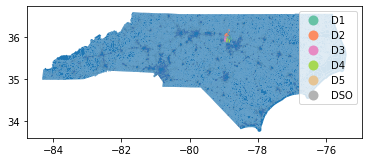

In [ ]:
# quickly plot the data adding a legend
# base = policebeats.plot()
policebeats.plot(column='LAWDIST', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,10),
                         markersize=0.001, 
                         cmap="Set2", ax=ncblockmap.plot(), 
                        #  aspect=1
                         );

In [194]:
ncblockmap = ncblockmap.to_crs("EPSG:4326")

In [195]:
racedata = pd.read_csv('/Users/erikrobertsson/Downloads/Race data files/DECENNIALPL2020.P1_data_with_overlays_2022-06-02T110204.csv', skiprows =1
)
racedata['GEOID20'] = racedata['id'].str[-15:]
racedata.drop('id', axis=1, inplace=True)
racedata

,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or African American alone,!!Total:!!Population of one race:!!American Indian and Alaska Native alone,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone,!!Total:!!Population of one race:!!Some Other Race alone,!!Total:!!Population of two or more races:,!!Total:!!Population of two or more races:!!Population of two races:,!!Total:!!Population of two or more races:!!Population of two races:!!White; Black or African American,!!Total:!!Population of two or more races:!!Population of two races:!!White; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of two races:!!White; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!White; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!White; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Asian; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!Asian; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; Asian; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; Asian; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!Black or African American; American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more ra

In [ ]:
racedata["GEOID20"].head(1)

0    370630001011000
Name: GEOID20, dtype: object

In [ ]:
#racedata2 = racedata.copy()
#racedata["GEOID20"] = racedata["GEOID20"].map(lambda g: str(int(g+0.1)))

TypeError: can only concatenate str (not "float") to str

In [196]:
durhamblockmap = ncblockmap[ncblockmap["COUNTYFP20"]=="063"]
len(durhamblockmap), len(ncblockmap),len(racedata),len(policebeats)

(4401, 236638, 4401, 37)

In [197]:
durhamracemap = pd.merge(racedata, durhamblockmap, on ='GEOID20')
durhamracemap


,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or African American alone,!!Total:!!Population of one race:!!American Indian and Alaska Native alone,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone,!!Total:!!Population of one race:!!Some Other Race alone,!!Total:!!Population of two or more races:,!!Total:!!Population of two or more races:!!Population of two races:,!!Total:!!Population of two or more races:!!Population of two races:!!White; Black or African American,!!Total:!!Population of two or more races:!!Population of two races:!!White; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of two races:!!White; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!White; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!White; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Asian; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!Asian; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; Asian; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; Asian; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!Black or African American; American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more ra

In [13]:
durhamracemap.geometry

0       POLYGON ((-78.88998 36.01852, -78.88995 36.019...
1       POLYGON ((-78.88993 36.02006, -78.88990 36.021...
2       POLYGON ((-78.88749 36.02015, -78.88746 36.021...
3       POLYGON ((-78.88872 36.01988, -78.88867 36.021...
4       POLYGON ((-78.88098 36.02211, -78.87992 36.022...
                              ...                        
4396    POLYGON ((-78.86527 35.87075, -78.86498 35.870...
4397    POLYGON ((-78.86568 35.87061, -78.86540 35.870...
4398    POLYGON ((-78.87003 35.86799, -78.86977 35.868...
4399    POLYGON ((-78.87243 35.89600, -78.87216 35.896...
4400    POLYGON ((-78.87929 35.93618, -78.87927 35.937...
Name: geometry, Length: 4401, dtype: geometry

In [198]:
durhamracemap = durhamblockmap.set_index('GEOID20').join(racedata.set_index('GEOID20'))
durhamracemap.head(3)

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or African American alone,!!Total:!!Population of one race:!!American Indian and Alaska Native alone,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone,!!Total:!!Population of one race:!!Some Other Race alone,!!Total:!!Population of two or more races:,!!Total:!!Population of two or more races:!!Population of two races:,!!Total:!!Population of two or more races:!!Population of two races:!!White; Black or African American,!!Total:!!Population of two or more races:!!Population of two races:!!White; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of two races:!!White; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!White; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!White; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Asian; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!Asian; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; Asian; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; Asian; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!Black or African American; American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!Black o

In [199]:
durhamracemap.columns = durhamracemap.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
durhamracemap.columns = durhamracemap.columns.str.replace('[#,@,&,!]', '')
durhamracemap.columns = durhamracemap.columns.str.replace('[:]', '_')
durhamracemap.head()

,statefp20,countyfp20,tractce20,blockce20,name20,mtfcc20,ur20,uace20,uatype20,funcstat20,aland20,awater20,intptlat20,intptlon20,geometry,geographic_area_name,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_population_of_two_or_more_races_,total_population_of_two_or_more_races_population_of_two_races_,total_population_of_two_or_more_races_population_of_two_races_white;_black_or_african_american,total_population_of_two_or_more_races_population_of_two_races_white;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_two_races_white;_asian,total_population_of_two_or_more_races_population_of_two_races_white;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_white;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_asian,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_asian;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_asian,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_asian;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_ra

In [201]:
#adding new columns to durham racemap
durhamracemap['propwhite']= durhamracemap['total_population_of_one_race_white_alone'] / durhamracemap['total_']
#durhamracemap['propblack']= durhamracemap['total_population_of_one_race_black_or_african_american_alone'] / durhamracemap['total_']
#durhamracemap['area'] = durhamracemap.area
#durhamracemap['popdensity']= durhamracemap['total_'] / durhamracemap['area']
# durhamracemap.sort_values(by='popdensity', inplace=True, ascending=False)
# durhamracemap = durhamracemap.drop(labels=['370630011001003','370630020254001','370630013031012','370630020372058','370630020343006'], axis=0)
#durhamracemap.head()

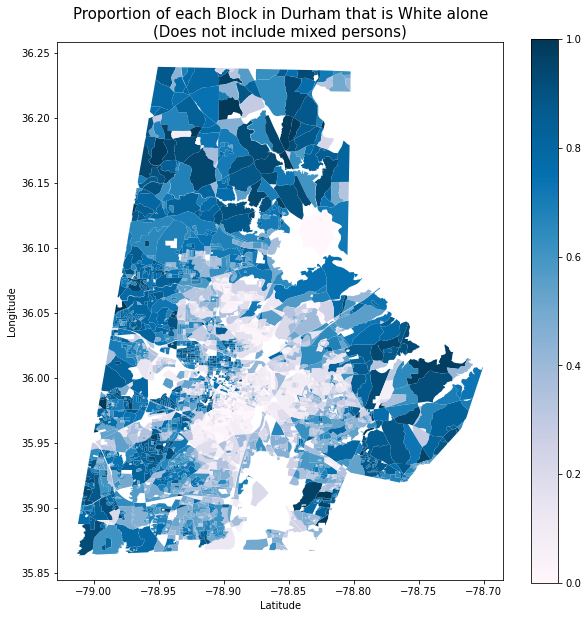

In [202]:
#Plot chloropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
durhamracemap.plot(column='propwhite',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1);

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of each Block in Durham that is White alone\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

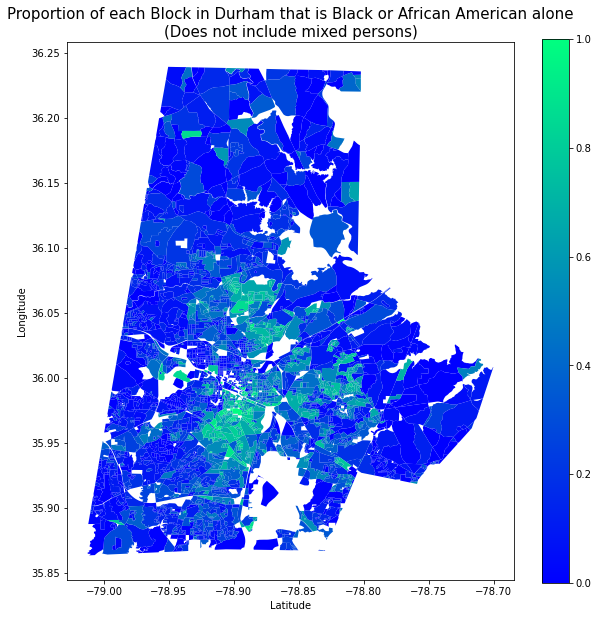

In [ ]:
#Plot chloropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
durhamracemap.plot(column='propblack',
                                legend=True,
                                cmap="winter", ax=ax, aspect=1);

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of each Block in Durham that is Black or African American alone\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [ ]:
durhamracemap.columns

Index(['statefp20', 'countyfp20', 'tractce20', 'blockce20', 'name20',
       'mtfcc20', 'ur20', 'uace20', 'uatype20', 'funcstat20', 'aland20',
       'awater20', 'intptlat20', 'intptlon20', 'geometry',
       'geographic_area_name', 'total_', 'total_population_of_one_race_',
       'total_population_of_one_race_white_alone',
       'total_population_of_one_race_black_or_african_american_alone',
       'total_population_of_one_race_american_indian_and_alaska_native_alone',
       'total_population_of_one_race_asian_alone',
       'total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone',
       'total_population_of_one_race_some_other_race_alone',
       'total_population_of_two_or_more_races_',
       'total_population_of_two_or_more_races_population_of_two_races_',
       'total_population_of_two_or_more_races_population_of_two_races_white;_black_or_african_american',
       'total_population_of_two_or_more_races_population_of_two_races_white;_american_indian_and

In [156]:
#Assign each census block to a police beat with for loop
cblockIndexToBeat = {}
sIndex = policebeats.sindex

for cblock_ind in durhamblockmap.index:
    cblock_geom = durhamblockmap.loc[cblock_ind]["geometry"]
    possibleBeatMatches = list(sIndex.intersection(cblock_geom.bounds))
    matched = False

    if len(possibleBeatMatches) > 0:
        possibleMatches = policebeats.iloc[possibleBeatMatches]
        intersectingAreas = possibleMatches.intersection(cblock_geom).area
        intersectingAreas /= cblock_geom.area
        police_beat_index = intersectingAreas.idxmax()
        maxIntersection = intersectingAreas.max()
    ##########
        if maxIntersection < 0.1:
            continue
    ##########
        if maxIntersection > 0:
            cblockIndexToBeat[cblock_ind] = policebeats.loc[police_beat_index]['LAWBEAT']
            matched = True

cblockDurhamBeats = ncblockmap[ncblockmap.index.isin(cblockIndexToBeat)]
cblockDurhamBeats['Beat'] = cblockDurhamBeats.index.map(lambda ii: cblockIndexToBeat[ii])
warnings.filterwarnings('ignore')


In [231]:
# creating cblockDurhamBeats with only beats that the safety department works with
cblockDurhamBeatscopy = cblockDurhamBeats.copy()
commsafe_list = [511, 512, 513, 411, 111, 112, 214, 223]
cblockDurhamBeatscopy = cblockDurhamBeats.loc[cblockDurhamBeats['Beat'].isin(commsafe_list)].copy()
cblockDurhamBeatscopy

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,Beat
874,37,063,001709,3001,370630017093001,Block 3001,G5040,R,None,None,S,918860,1497,+36.0511955,-078.8989718,"POLYGON ((-78.90312 36.05133, -78.90293 36.051...",223
3649,37,063,001801,6041,370630018016041,Block 6041,G5040,R,None,None,S,212123,9487,+36.0155379,-078.8706505,"POLYGON ((-78.87550 36.01421, -78.87371 36.014...",214
10944,37,063,000101,1028,370630001011028,Block 1028,G5040,R,None,None,S,435000,2847,+36.0161756,-078.8795383,"POLYGON ((-78.88806 36.01514, -78.88789 36.015...",214
11876,37,063,001801,6033,370630018016033,Block 6033,G5040,R,None,None,S,131608,6435,+36.0263370,-078.8611270,"POLYGON ((-78.86503 36.02664, -78.86499 36.026...",214
12204,37,063,001801,7005,370630018017005,Block 7005,G5040,R,None,None,S,11498,1223,+36.0602307,-078.8586903,"POLYGON ((-78.85984 36.06053, -78.85928 36.060...",214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235109,37,063,002200,2031,370630022002031,Block 2031,G5040,R,None,None,S,14546,0,+35.9983414,-078.8990835,"POLYGON ((-78.89993 35.99915, -78.89960 35.998...",512
235830,37,063,002300,1027,370630023001027,Block 1027,G5040,R,None,None,S,57219,0,+35.9854948,-078.9077482,"POLYGON ((-78.90906 35.98449, -78.90900 35.984...",411
236139,37,063,002200,2048,370630022002048,Block 2048,G5040,R,None,None,S,10849,0,+35.9949422,-078.8981501,"POLYGON ((-78.89882 35.99520, -78.89875 35.995...",512
236183,37,063,002200,1012,370630022001012,Block 1012,G5040,R,None,None,S,11653,0,+36.0007075,-078.9093748,"POLYGON ((-78.90950 36.00137, -78.90934 36.001...",511


In [238]:
# creating beat combined with race and blocks but keeping block geometries
blockswithrace = gpd.sjoin(durhamracemap, cblockDurhamBeatscopy)
blockswithrace['propwhite']= blockswithrace['total_population_of_one_race_white_alone'] / blockswithrace['total_']
blockswithrace.head(3)

,statefp20,countyfp20,tractce20,blockce20,name20,mtfcc20,ur20,uace20,uatype20,funcstat20,aland20,awater20,intptlat20,intptlon20,geometry,geographic_area_name,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_population_of_two_or_more_races_,total_population_of_two_or_more_races_population_of_two_races_,total_population_of_two_or_more_races_population_of_two_races_white;_black_or_african_american,total_population_of_two_or_more_races_population_of_two_races_white;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_two_races_white;_asian,total_population_of_two_or_more_races_population_of_two_races_white;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_white;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_asian,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_asian;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_asian,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_asian;_native_hawaiian_and_other_pacific_islander,...,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_asian;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_american_indian_and_alaska_native;_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_american_indian_and_alaska_native;_asian;_some_other_race,total_population_of_t

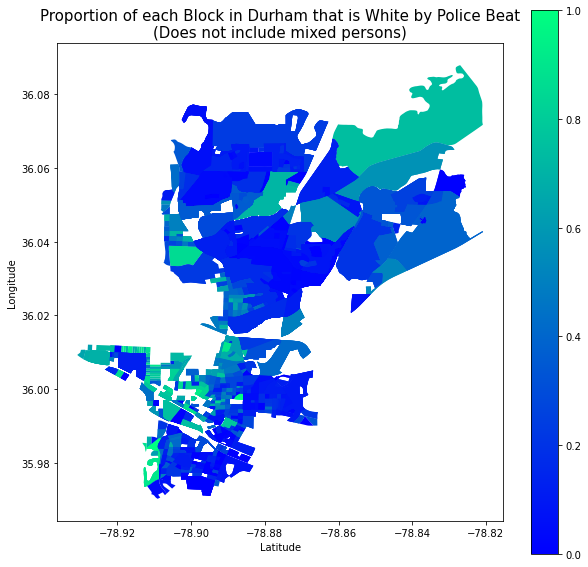

In [245]:
# plotting the proportion of white people by block in just the saftey department beats
fig, ax = plt.subplots(figsize = (10,10))
blockswithrace.plot(column='propwhite',
                                legend=True,
                                cmap="winter", ax=ax, aspect=1);

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of each Block in Durham that is White by Police Beat\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [205]:
#putting race data into the police beat and block data
beatswithrace = gpd.sjoin(cblockDurhamBeats, durhamracemap)

#beatswithrace = pd.merge(racedata, cblockDurhamBeats, on ='GEOID20')
beatswithrace.head(3)

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,Beat,index_right,statefp20,countyfp20,tractce20,blockce20,name20,mtfcc20,ur20,uace20,uatype20,funcstat20,aland20,awater20,intptlat20,intptlon20,geographic_area_name,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_population_of_two_or_more_races_,total_population_of_two_or_more_races_population_of_two_races_,total_population_of_two_or_more_races_population_of_two_races_white;_black_or_african_american,total_population_of_two_or_more_races_population_of_two_races_white;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_two_races_white;_asian,total_population_of_two_or_more_races_population_of_two_races_white;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_white;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_asian,...,total_population_of_two_or_more_races_population_of_two_races_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_asian;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_asian,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_asian;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_asian;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_a

In [211]:
#summing the population by police beat
popsumbybeat = beatswithrace.groupby('Beat', as_index=False).sum()
popsumbybeat.head()


,Beat,ALAND20,AWATER20,aland20,awater20,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_population_of_two_or_more_races_,total_population_of_two_or_more_races_population_of_two_races_,total_population_of_two_or_more_races_population_of_two_races_white;_black_or_african_american,total_population_of_two_or_more_races_population_of_two_races_white;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_two_races_white;_asian,total_population_of_two_or_more_races_population_of_two_races_white;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_white;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_asian,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_asian;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_asian,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_asian;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_asian;_native_hawaiian_and_other_pacific_islander,total_popul

In [159]:
#adding beat geometry to popsumbybeat
raceineachbeat = pd.merge(popsumbybeat, policebeats, left_on='Beat', right_on='LAWBEAT')
raceineachbeat = raceineachbeat.to_crs("EPSG:4326")
#raceineachbeat = gpd.sjoin(policebeats, popsumbybeat)
raceineachbeat.head(3)

,Beat_x,ALAND20,AWATER20,aland20,awater20,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_population_of_two_or_more_races_,total_population_of_two_or_more_races_population_of_two_races_,total_population_of_two_or_more_races_population_of_two_races_white;_black_or_african_american,total_population_of_two_or_more_races_population_of_two_races_white;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_two_races_white;_asian,total_population_of_two_or_more_races_population_of_two_races_white;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_white;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_asian,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_asian;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_asian,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_asian;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_asian;_native_hawaiian_and_other_pacific_islander,total_pop

In [161]:
#adding new columns to race in police beat data set
raceineachbeat['area'] = raceineachbeat.area
raceineachbeat['popdensity']= raceineachbeat['total_'] / raceineachbeat['area']
raceineachbeat['propwhite']= raceineachbeat['total_population_of_one_race_white_alone'] / raceineachbeat['total_']
raceineachbeat['propblack']= raceineachbeat['total_population_of_one_race_black_or_african_american_alone'] / raceineachbeat['total_']
raceineachbeat.head()

,Beat_x,ALAND20,AWATER20,aland20,awater20,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_population_of_two_or_more_races_,total_population_of_two_or_more_races_population_of_two_races_,total_population_of_two_or_more_races_population_of_two_races_white;_black_or_african_american,total_population_of_two_or_more_races_population_of_two_races_white;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_two_races_white;_asian,total_population_of_two_or_more_races_population_of_two_races_white;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_white;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_asian,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_asian;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_asian,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_asian;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_asian;_native_hawaiian_and_other_pacific_islander,total_pop

In [162]:
raceineachbeat.sort_values(by='popdensity', inplace=True, ascending=False)
raceineachbeat

,Beat_x,ALAND20,AWATER20,aland20,awater20,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_population_of_two_or_more_races_,total_population_of_two_or_more_races_population_of_two_races_,total_population_of_two_or_more_races_population_of_two_races_white;_black_or_african_american,total_population_of_two_or_more_races_population_of_two_races_white;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_two_races_white;_asian,total_population_of_two_or_more_races_population_of_two_races_white;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_white;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_asian,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_asian;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_asian,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_asian;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_asian;_native_hawaiian_and_other_pacific_islander,total_pop

In [ ]:
raceineachbeat.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

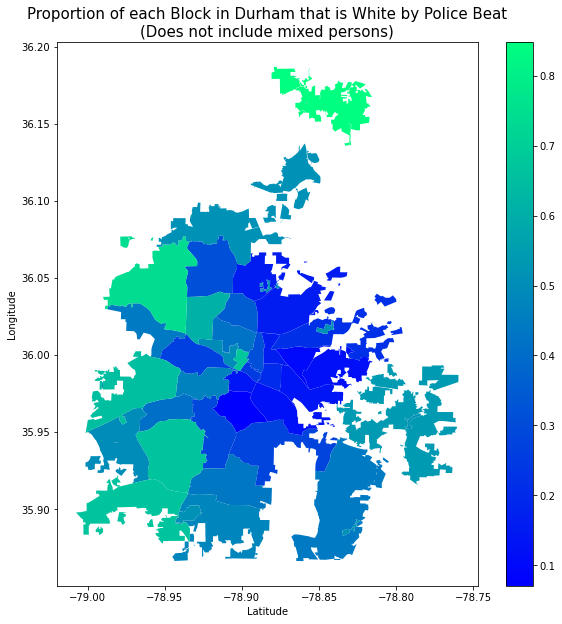

In [163]:
#trying to plot the race data by beat
fig, ax = plt.subplots(figsize = (10,10))
raceineachbeat.plot(column='propwhite',
                                legend=True,
                                cmap="winter", ax=ax, aspect=1);

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of each Block in Durham that is White by Police Beat\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

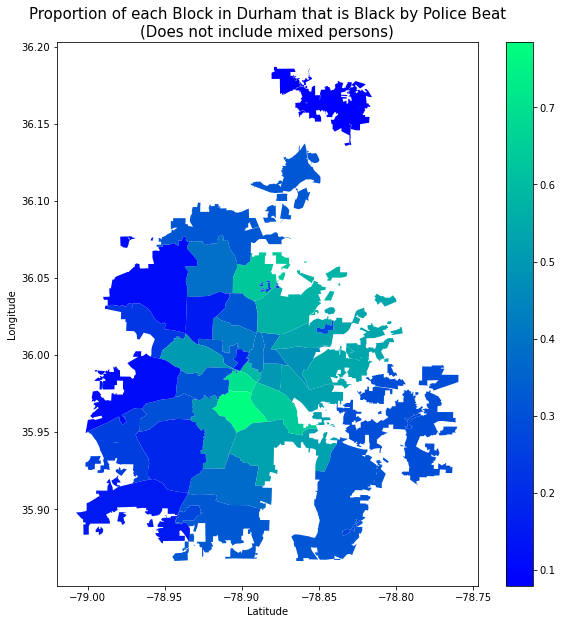

In [170]:
#trying to plot the race data by beat
fig, ax = plt.subplots(figsize = (10,10))
raceineachbeat.plot(column='propblack',
                                legend=True,
                                cmap="winter", ax=ax, aspect=1);

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of each Block in Durham that is Black by Police Beat\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [165]:
min(raceineachbeat.popdensity), max(raceineachbeat.popdensity)

(3734424.5431722323, 268799011.5168631)

In [167]:
len(set(list(raceineachbeat.Beat_x)))

37

In [168]:
# singlebeat = policebeats[policebeats.LAWBEAT==214]
# singlebeat = singlebeat.reset_index()

# for ii in singlebeat.index:
#     if singlebeat.loc[ii, "geometry"].intersection(singlebeat.loc[ii, "geometry"]).area != singlebeat.loc[ii, "geometry"].area:
#         print("problem at", ii, singlebeat.loc[ii, "geometry"].intersection(singlebeat.loc[ii, "geometry"]).area- singlebeat.loc[ii, "geometry"].area)
#     for jj in range(ii+1,len(singlebeat)):
#         if abs(singlebeat.loc[ii, "geometry"].intersection(singlebeat.loc[jj, "geometry"]).area - singlebeat.loc[ii, "geometry"].area) < 10**-6:
#             print("same: ", ii, jj)
        


problem at 0 6.505213034913027e-19


In [187]:
#trying to plot the race data by beat
fig, base = plt.subplots(figsize = (10,10))
raceineachbeat.plot(column='popdensity',
                                legend=True,
                                vmin = min(raceineachbeat.popdensity),
                                vmax = max(raceineachbeat.popdensity),
                                cmap="winter", ax=base, aspect=1, );

raceineachbeat[raceineachbeat.index==38].plot(ax = base, color="red")

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of each Block in Durham that is Black by Police Beat\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 2 Axes>

In [172]:
Total = raceineachbeat['area'].sum()
Total


0.03170018445492205

In [173]:
#seeing how many blocks there are per beat
blocksperbeat = beatswithrace.groupby( ["Beat"] ).size().to_frame(name = 'block_count').reset_index()
meanblocksperbeat = blocksperbeat[["block_count"]].mean()
blocksperbeat

,Beat,block_count
0,111,692
1,112,320
2,113,665
3,114,655
4,121,687
5,122,292
6,123,399
7,124,1197
8,211,924
9,212,1313


192  pwd
  193  cd Documents/dataplus
  194  ls
  195  cd dataplus-project27-community-safety-durham/
  196  git log --oneline --decorate --graph --all
  198  git status
  199  git add
  200  git add 10_code/dpddata.ipynb
  201  git commit -m "createdracemaps"
  202  git push
  203  git pull


Starting to analyze how population and races affects calls by combining caller data with census data

In [94]:
beatracewithcalls = gpd.sjoin(raceineachbeat, nonzero)
beatracewithcalls

,Beat_left,ALAND20,AWATER20,aland20,awater20,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_population_of_two_or_more_races_,total_population_of_two_or_more_races_population_of_two_races_,total_population_of_two_or_more_races_population_of_two_races_white;_black_or_african_american,total_population_of_two_or_more_races_population_of_two_races_white;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_two_races_white;_asian,total_population_of_two_or_more_races_population_of_two_races_white;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_white;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_asian,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_asian;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_asian,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_asian;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_asian;_native_hawaiian_and_other_pacific_islander,total_

In [87]:
#seeing how many calls there are per beat
callsperbeat = beatswithrace.groupby( ["Beat"] ).size().to_frame(name = 'dpdcalls_count').reset_index()
meancallsperbeat = callsperbeat[["dpdcalls_count"]].mean()
meancallsperbeat
callsperbeat

,Beat,dpdcalls_count
0,111,692
1,112,320
2,113,665
3,114,655
4,121,687
5,122,292
6,123,399
7,124,1197
8,211,924
9,212,1313


In [90]:
nonzerocallsperbeat = nonzero.groupby( ["Beat"] ).size().to_frame(name = 'dpdcalls_count').reset_index()
meancallsperbeat = nonzerocallsperbeat[["dpdcalls_count"]].mean()
nonzerocallsperbeat


,Beat,dpdcalls_count
0,111,2730
1,112,2662
2,113,3095
3,114,3059
4,121,2812
5,122,3494
6,123,2928
7,124,2067
8,211,4174
9,212,3404


In [92]:
Total = nonzerocallsperbeat['dpdcalls_count'].sum()
Total

122128

In [227]:
dpdbeats = ['511', '512', '513', '411', '111', '112', '214', '223']
dpdbeatracewithcalls = beatracewithcalls[beatracewithcalls['Beat_right'].isin(dpdbeats)] 
dpdbeatracewithcalls('Beat_right')

TypeError: 'GeoDataFrame' object is not callable

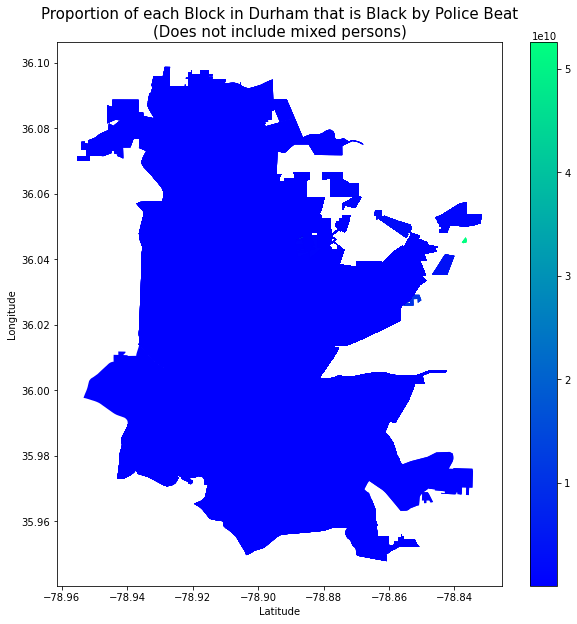

In [183]:
#trying to plot the race data by beat
fig, base = plt.subplots(figsize = (10,10))
dpdbeatracewithcalls.plot(column='popdensity',
                                legend=True,
                                cmap="winter", ax=base, aspect=1, );

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of each Block in Durham that is Black by Police Beat\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()